In [8]:

import logging
import sys

from neural_bandits.datasets.movie_lens import MovieLensDataset

logging.basicConfig(level=logging.INFO)

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler(sys.stdout))


dataset = MovieLensDataset(dest_path="./data", version="ml-latest-small", outer_product=True, L=100, svd_rank=32)

INFO:neural_bandits.datasets.movie_lens:Dataset already downloaded.
INFO:neural_bandits.datasets.movie_lens:Dataset already extracted.


In [5]:
from torch.utils.data import DataLoader

from neural_bandits.algorithms.linear_bandits import LinearUCBBandit
from neural_bandits.modules.linear_bandit_module import LinearBanditModule

n_features = 1024
model = LinearBanditModule(LinearUCBBandit, n_features)

regrets = []
model.log = lambda x, y, on_step, on_epoch, prog_bar: regrets.append(y) if x == "regret" and on_step else None

counter = 0
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)
for batch_idx, batch in enumerate(train_loader):
    if counter > 1000:
        break
    model.training_step(batch, batch_idx)
    counter += 1

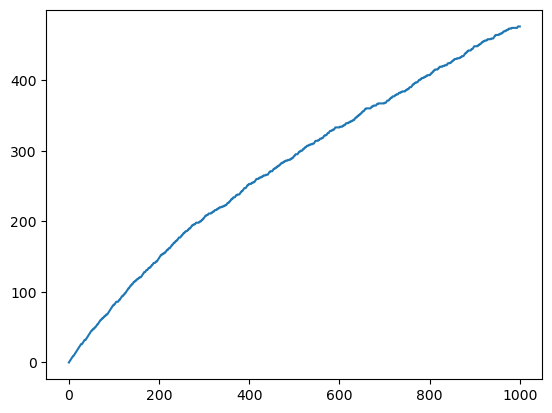

In [6]:
# plot the regrets

import matplotlib.pyplot as plt

# plot cumulative regret
cumulative_regrets = [sum(regrets[:i]) for i in range(len(regrets))]
plt.plot(range(len(regrets)), cumulative_regrets)

In [13]:
print(cumulative_regrets[-1])

tensor(975.)
